In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('./Prostate_Cancer.csv')

# check the dimension of the dataset
print(data.shape)

# view the first 5 rows of the dataset
data.head()

(100, 10)


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
# top level overview of the dataset
data.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
# column 'id' will not be used for analysis
# drop column 'id'

data.drop(columns=['id'], axis=1, inplace=True) # drop column 'id' from the dataset to avoid overfitting
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

data['diagnosis_result'] = data['diagnosis_result'].astype('category')

# List of features to create scatter plots
features = ['radius', 'texture', 'perimeter', 'area',
            'smoothness', 'compactness', 'symmetry', 'fractal_dimension']

# Create scatter plots for pairs of features vs. diagnosis_result
for i, feature1 in enumerate(features):
    for feature2 in features[i+1:]:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x=feature1, y=feature2,
                        hue='diagnosis_result', palette='viridis')
        plt.title(f'Scatter Plot of {feature1} vs {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.grid(alpha=0.3)
        plt.legend(title='Diagnosis Result')
        plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

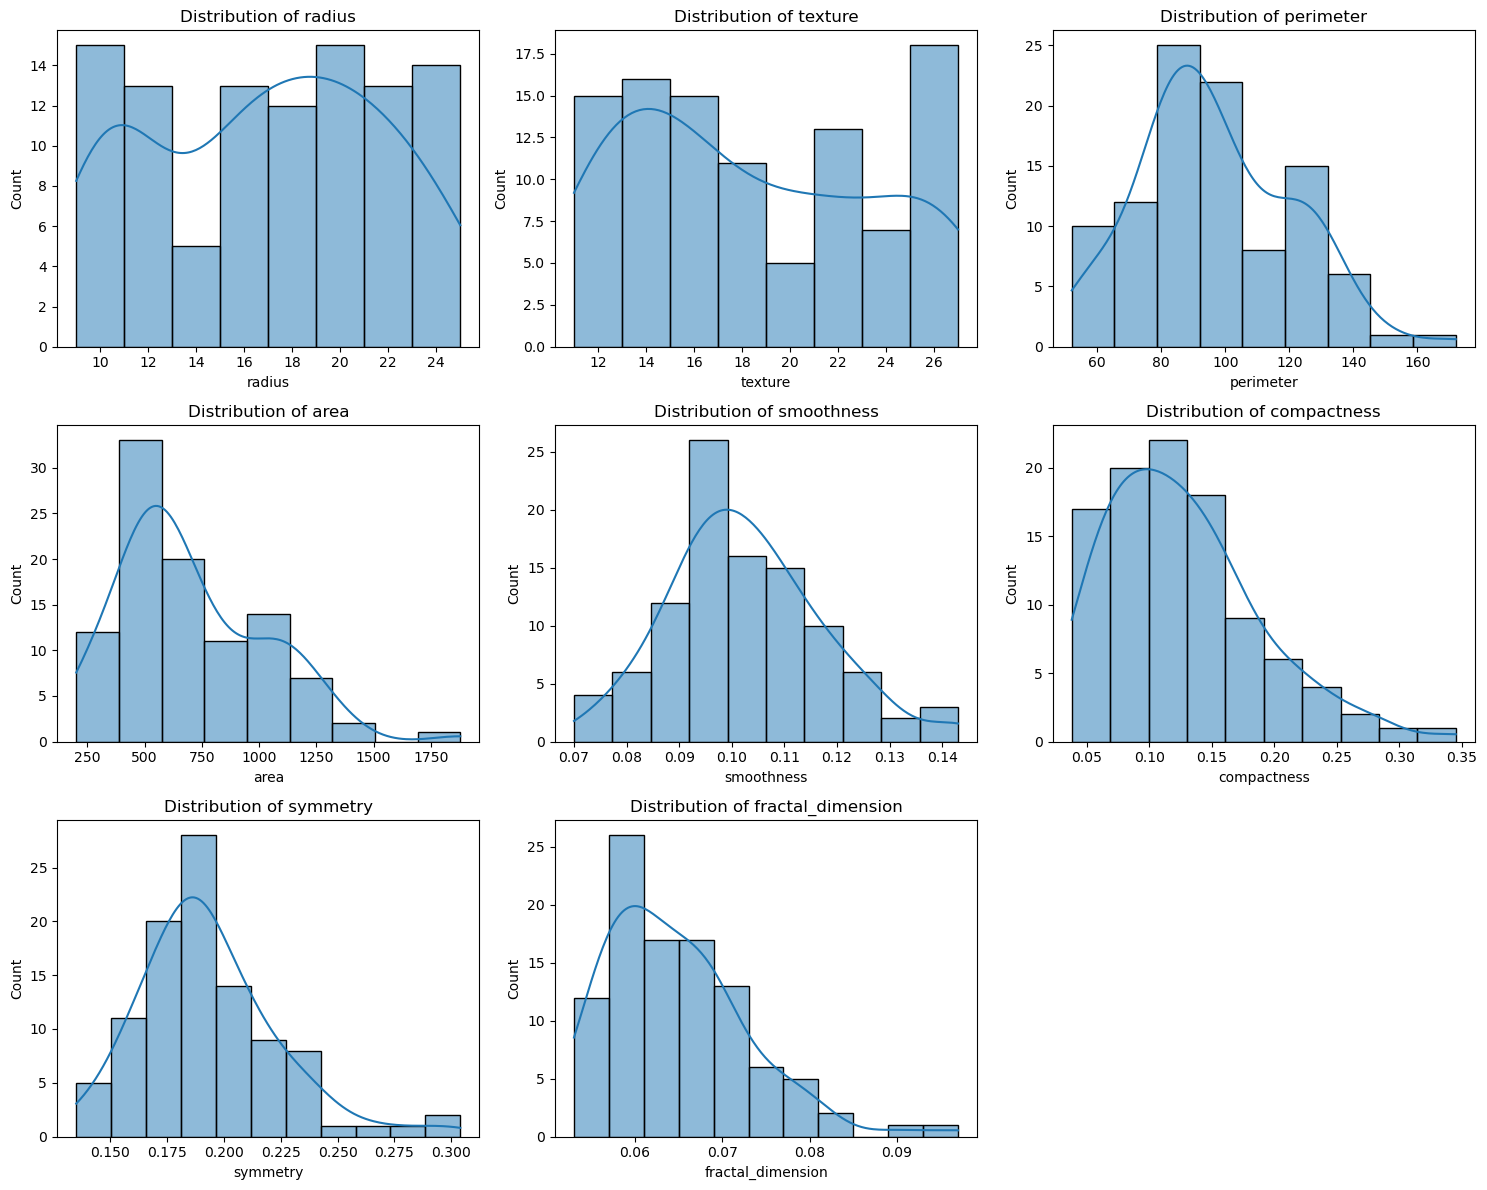

In [7]:

# List of features to plot
features = ['radius', 'texture', 'perimeter', 'area',
            'smoothness', 'compactness', 'symmetry', 'fractal_dimension']

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a histogram for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

 the frequency of each unique value in the column 'diagnosis_result' is: 
 diagnosis_result
B    38
M    62
Name: count, dtype: int64


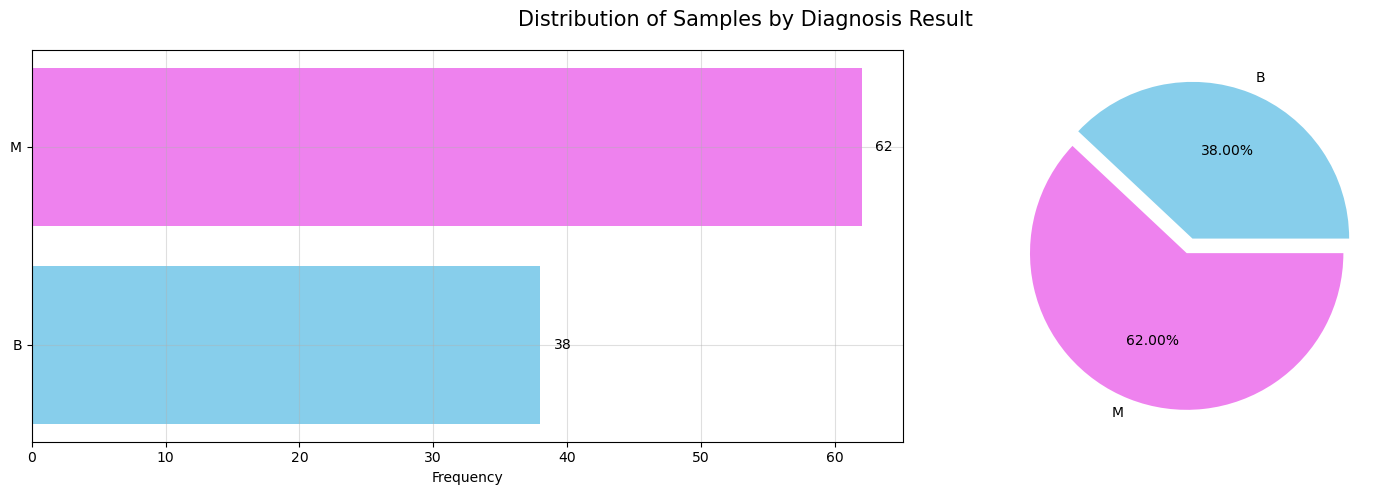

In [22]:
# distribution of samples by diagnosis result
diagnosis = data['diagnosis_result'].value_counts().sort_index() # count the frequency of each unique value in the column 'diagnosis_result'
print(" the frequency of each unique value in the column 'diagnosis_result' is: \n", diagnosis)

colors = ['skyblue','violet','orange','lightgreen','lemonchiffon','lightcoral','lightcyan','lightsalmon','mistyrose']
# chnge the color of the bar chart and pie chart


# visualiazation (bar chart & pie chart)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]}) # create a figure and a set of subplots. figure is the final image that may contain 1 or more axes. axes are the individual plots in the figure. figsize is the size of the figure in inches. gridspec_kw is the keyword arguments for GridSpec which is used to specify the geometry of the grid that a subplot will be placed.
axes[0].barh(y=diagnosis.index, width=diagnosis.values, color=colors) # create a horizontal bar chart. y is the y coordinates of the bars. width is the width of the bars. color is the color of the bars.
axes[0].set_xlabel('Frequency') # set the label for the x-axis of the bar chart, which is 'Frequency'

for index, values in enumerate(diagnosis):
    axes[0].text(values+1, index, str(values), va='center') # add text to the bar chart. values+1 is the x-coordinate of the text. index is the y-coordinate of the text. str(values) is the text to be added. va is the vertical alignment of the text.

axes[0].grid(alpha=0.4) # add grid lines to the bar chart. alpha is the transparency of the grid lines.

axes[1].pie(diagnosis.values, labels=diagnosis.index, explode=([0.05]*len(diagnosis.index)), colors=colors, autopct='%.2f%%') # create a pie chart. labels is the labels of the pie chart. explode is the distance of the slices from the center of the pie chart. colors is the color of the slices. autopct is the format of the percentage of the slices.
figure.suptitle('Distribution of Samples by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


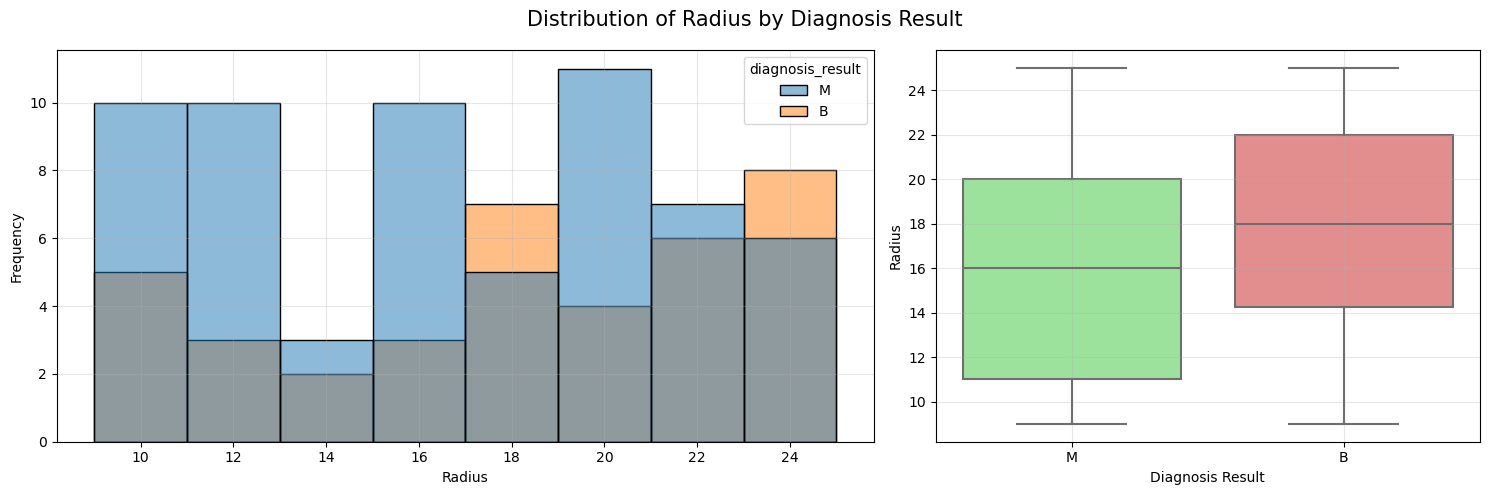

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,17.947368,5.061499,9.0,14.25,18.0,22.0,25.0
M,62.0,16.177419,4.678252,9.0,11.00,16.0,20.0,25.0


Test statistic:  1.78
Test p-value: 0.0782
There is insufficient evidence to conclude a statistical significant difference of mean radius between benign and malignant patients.


In [13]:
from scipy.stats import ttest_ind # import the independent T test function from the scipy library

# statistical significant difference of the `radius` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['radius'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Radius')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['radius'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Radius')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Radius by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').radius.describe())

# perform independent T test test to compare the mean tenure year between benign and malignant patient
df = data.groupby('diagnosis_result')
benign = df.get_group('B')
malignant = df.get_group('M')


res = ttest_ind(benign['radius'],malignant['radius'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean radius between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean radius between benign and malignant patients.')

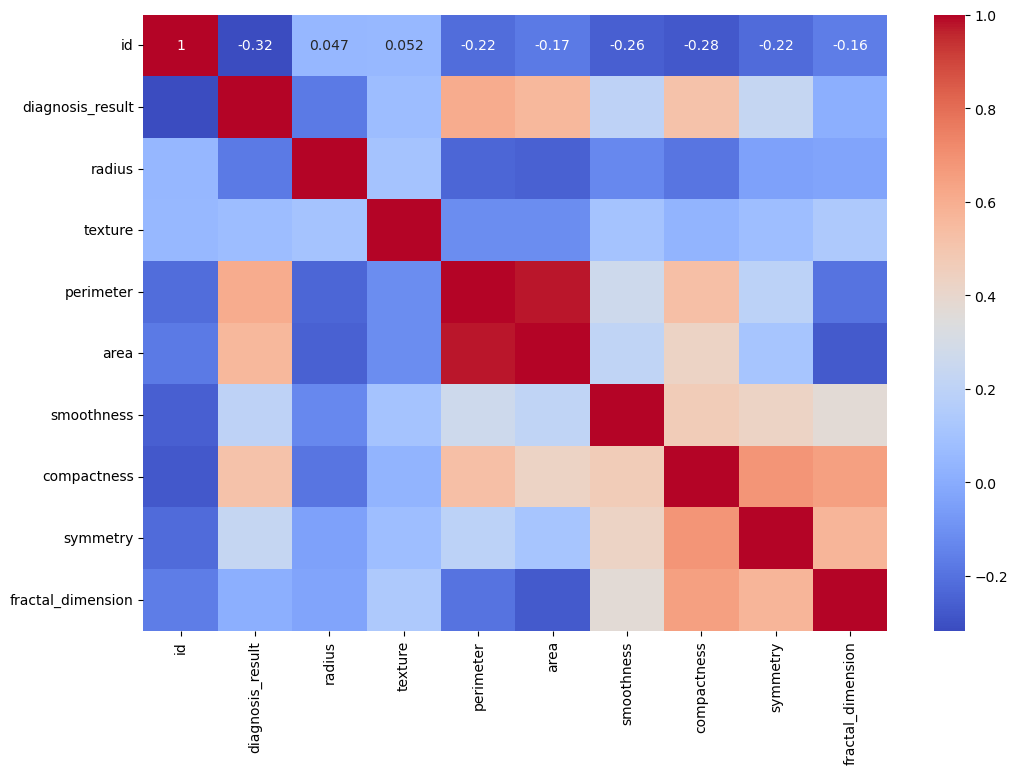

In [27]:
# Correlation matrix and heatmap
# convert M and B to 1 and 0 respectively
data['diagnosis_result'] = data['diagnosis_result'].map({'M':1, 'B':0})
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\mikiy\AppData\Local\Temp\ipykernel_19292\1121128904.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='radius', y='perimeter', hue='diagnosis_result', palette=colors)


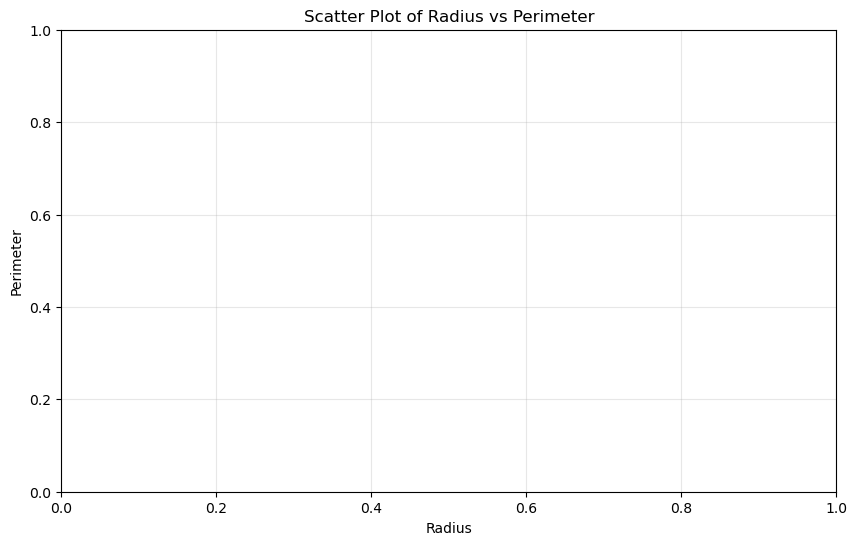

In [41]:
# scatter plot of the correlation between the radius and the perimeter
# the color of the scatter plot will be based on the diagnosis result
colors = ['skyblue','lightcoral','lightgreen','lightcyan','lightsalmon','mistyrose']
# give me the scatter plot of cancer patients based on the radius and perimeter. raduis mmin is 30 and perimeter max is 120. Parameter min is 80 and max is 200
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='radius', y='perimeter', hue='diagnosis_result', palette=colors)
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.title('Scatter Plot of Radius vs Perimeter')
plt.grid(alpha=0.3)
plt.show()



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


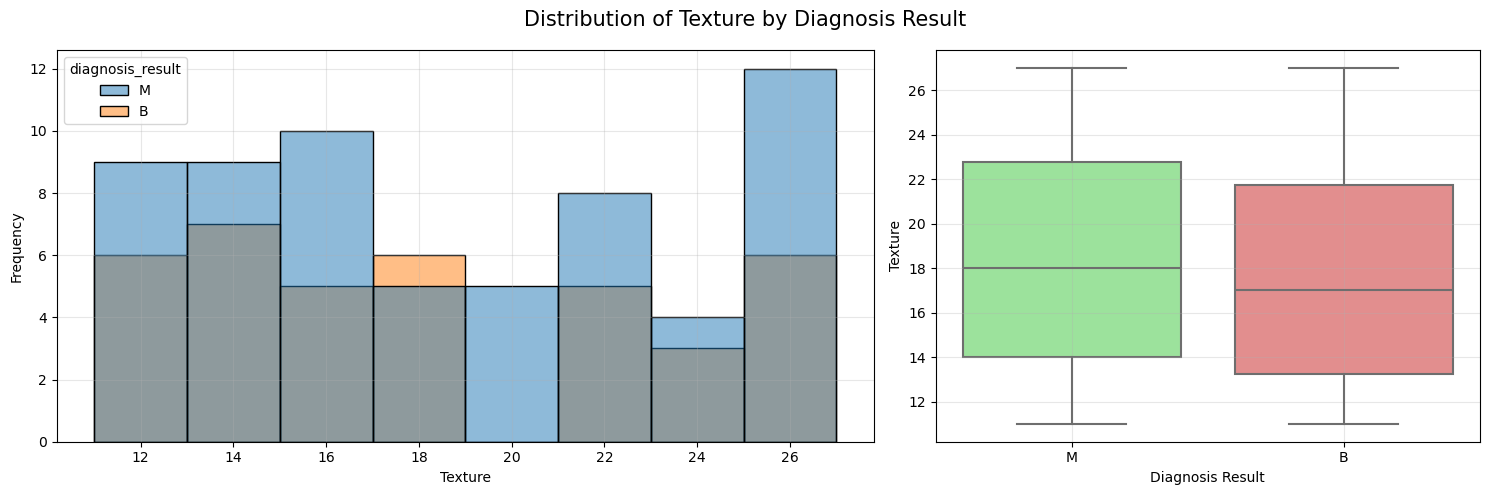

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,17.763158,5.185396,11.0,13.25,17.0,21.75,27.0
M,62.0,18.516129,5.218950,11.0,14.00,18.0,22.75,27.0


Test statistic:  -0.702
Test p-value: 0.4843
There is insufficient evidence to conclude a statistical significant difference of mean texture between benign and malignant patients.


In [14]:
# statistical significant difference of the `texture` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['texture'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Texture')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['texture'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Texture')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Texture by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').texture.describe())

res = ttest_ind(benign['texture'],malignant['texture'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean texture between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean texture between benign and malignant patients.')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


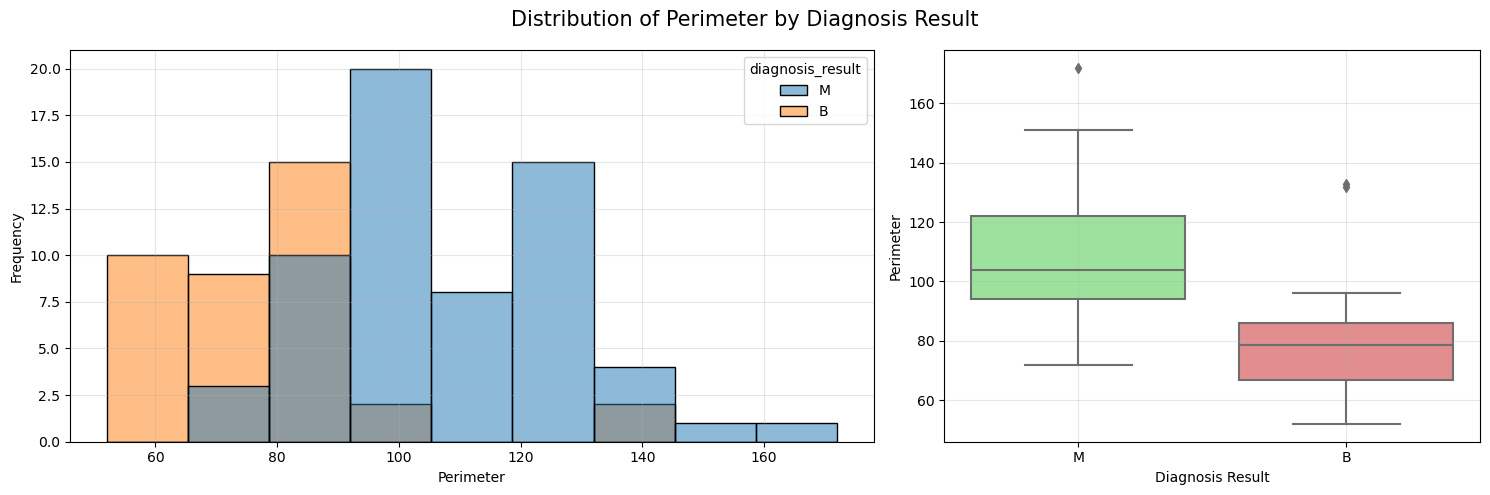

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,78.500000,17.478558,52.0,66.75,78.5,86.0,133.0
M,62.0,107.983871,19.715594,72.0,94.00,104.0,122.0,172.0


Test statistic:  -7.5711
Test p-value: 0.0
There is a statistical significant difference between the mean perimeter between benign and malignant patients.


In [15]:
# statistical significant difference of the `perimeter` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['perimeter'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Perimeter')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['perimeter'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Perimeter')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Perimeter by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').perimeter.describe())

res = ttest_ind(benign['perimeter'],malignant['perimeter'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean perimeter between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean perimeter between benign and malignant patients.')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


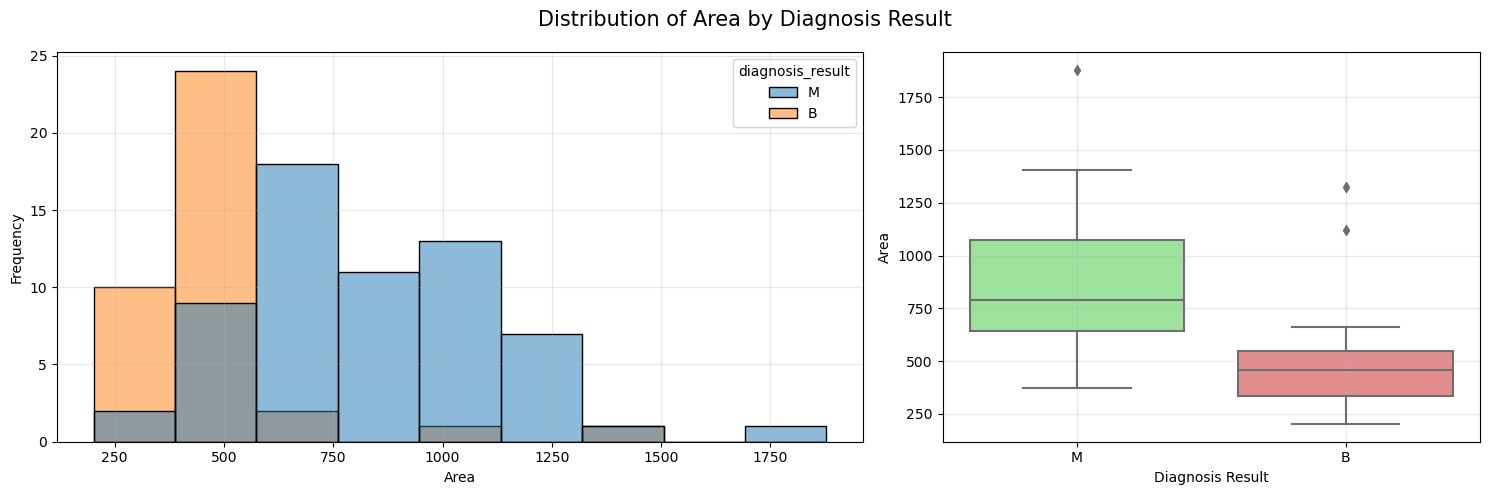

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,474.342105,219.603731,202.0,332.5,458.5,545.75,1326.0
M,62.0,842.951613,290.103680,371.0,643.5,790.5,1075.75,1878.0


Test statistic:  -6.734
Test p-value: 0.0
There is a statistical significant difference between the mean area between benign and malignant patients.


In [16]:
# statistical significant difference of the `area` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['area'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['area'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Area')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Area by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').area.describe())

res = ttest_ind(benign['area'],malignant['area'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean area between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean area between benign and malignant patients.')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


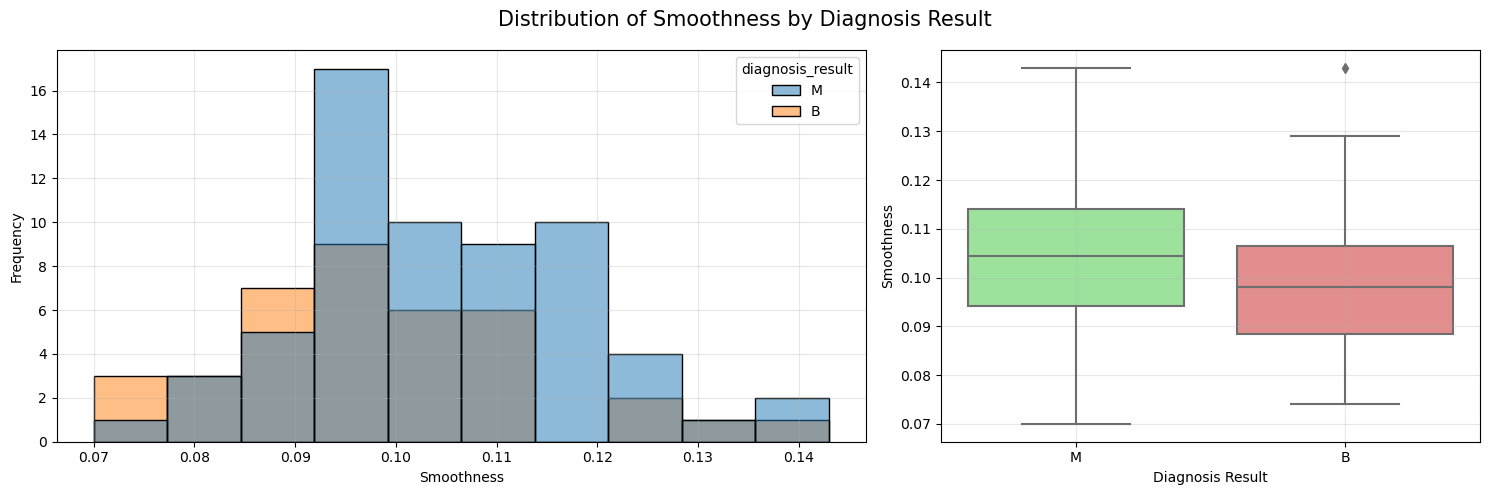

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,0.099053,0.015194,0.074,0.08850,0.0980,0.1065,0.143
M,62.0,0.104984,0.013940,0.070,0.09425,0.1045,0.1140,0.143


Test statistic:  -1.9957
Test p-value: 0.0487
There is a statistical significant difference between the mean smoothness between benign and malignant patients.


In [17]:
# statistical significant difference of the `smoothness` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['smoothness'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Smoothness')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['smoothness'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Smoothness')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Smoothness by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').smoothness.describe())

res = ttest_ind(benign['smoothness'],malignant['smoothness'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean smoothness between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean smoothness between benign and malignant patients.')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


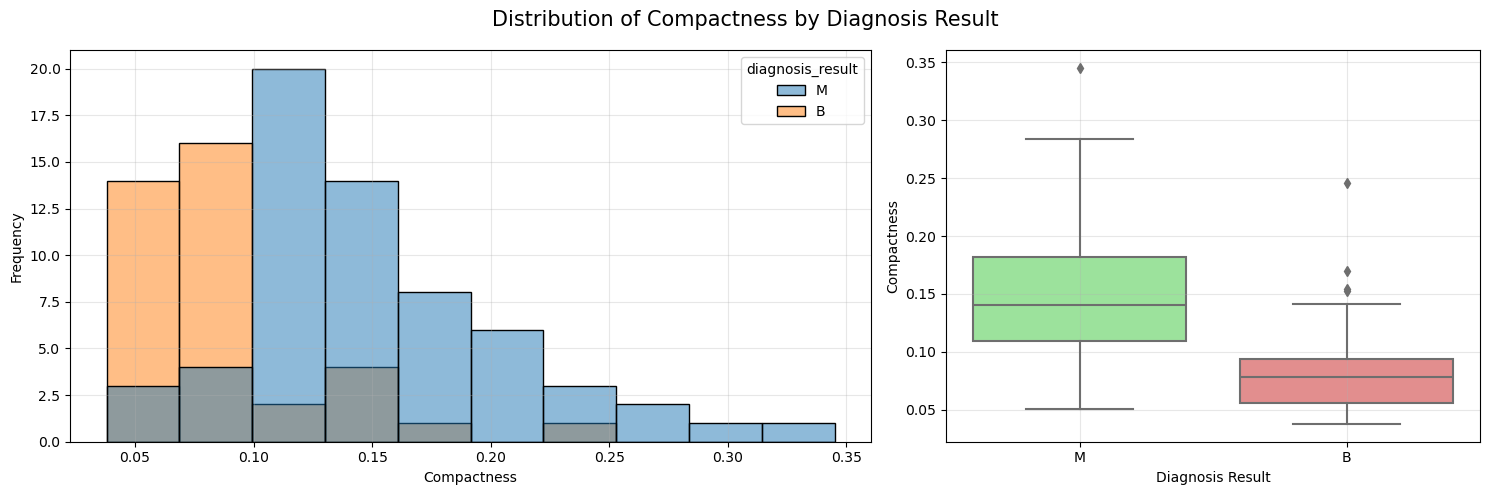

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,0.086895,0.042450,0.038,0.05600,0.0785,0.094,0.246
M,62.0,0.151097,0.058159,0.051,0.10925,0.1405,0.182,0.345


Test statistic:  -5.9043
Test p-value: 0.0
There is a statistical significant difference between the mean compactness between benign and malignant patients.


In [18]:
# statistical significant difference of the `compactness` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['compactness'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Compactness')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['compactness'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Compactness')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Compactness by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').compactness.describe())

res = ttest_ind(benign['compactness'],malignant['compactness'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean compactness between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean compactness between benign and malignant patients.')

C:\Users\mikiy\AppData\Local\Temp\ipykernel_19292\2263052721.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=data['symmetry'], hue=data['diagnosis_result'], palette=color, ax=axes[0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: Invalid RGBA argument: None

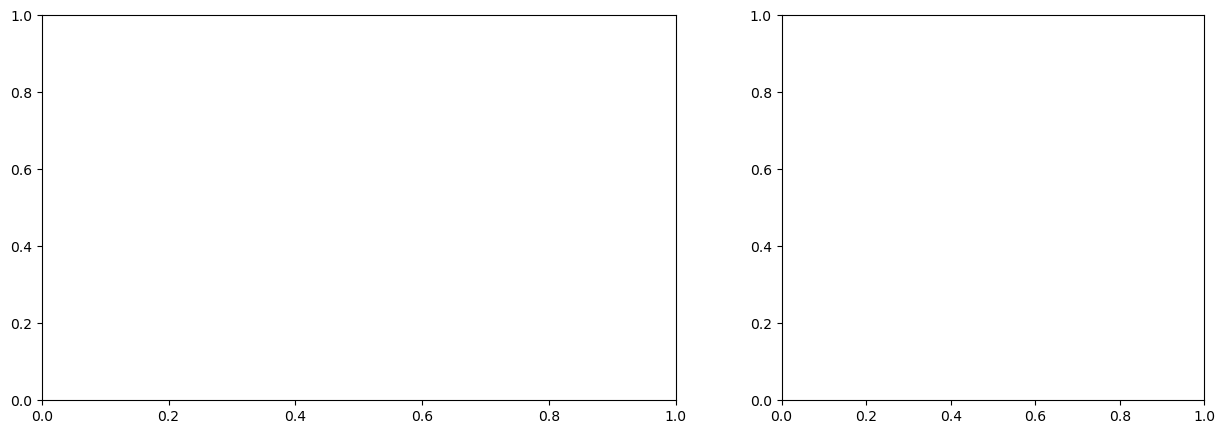

In [51]:
# Eda for importance of the features 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette('husl', 10)
# statistical significant difference of the `symmetry` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['symmetry'], hue=data['diagnosis_result'], palette=color, ax=axes[0])
axes[0].set_xlabel('Symmetry')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['symmetry'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Symmetry')
axes[1].grid(alpha=0.3)


figure.suptitle('Distribution of Symmetry by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').symmetry.describe())

res = ttest_ind(benign['symmetry'],malignant['symmetry'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean symmetry between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean symmetry between benign and malignant patients.')
    
    


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


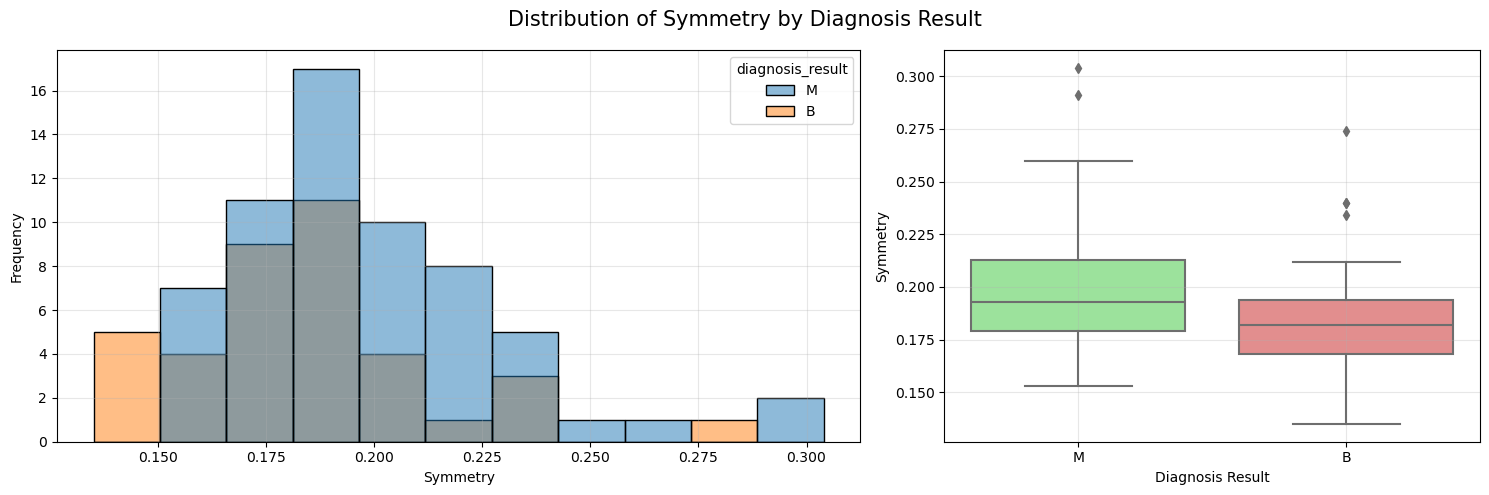

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,0.184053,0.029971,0.135,0.16800,0.182,0.19375,0.274
M,62.0,0.198758,0.030162,0.153,0.17925,0.193,0.21300,0.304


Test statistic:  -2.3722
Test p-value: 0.0196
There is a statistical significant difference between the mean symmetry between benign and malignant patients.


In [19]:
# statistical significant difference of the `symmetry` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['symmetry'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Symmetry')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['symmetry'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Symmetry')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Symmetry by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').symmetry.describe())

res = ttest_ind(benign['symmetry'],malignant['symmetry'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean symmetry between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean symmetry between benign and malignant patients.')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


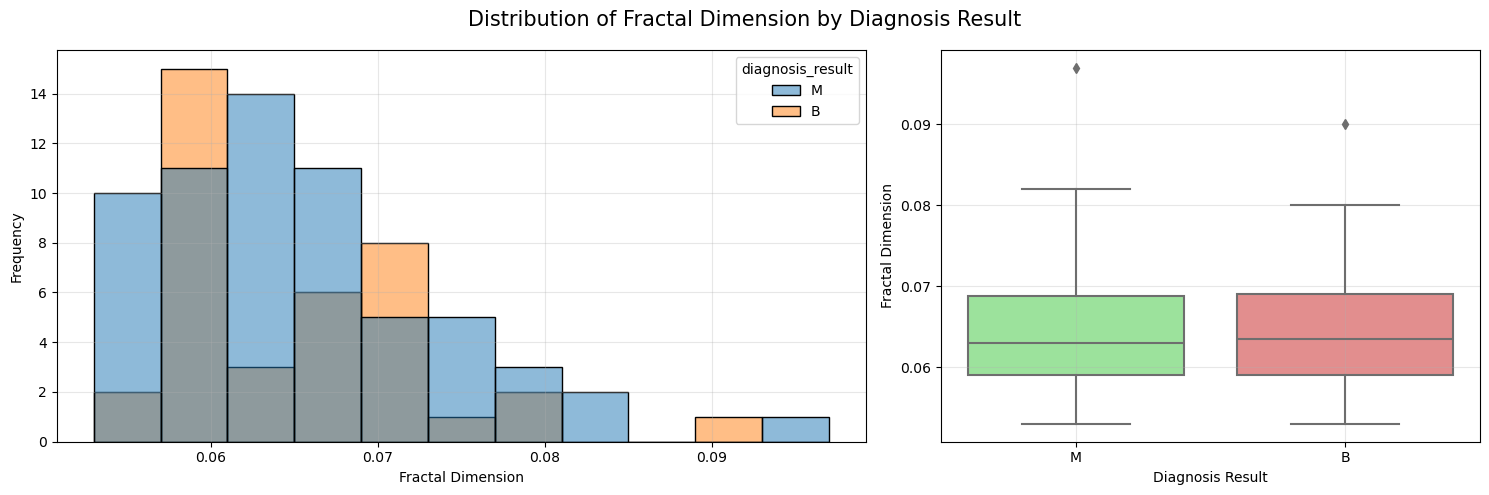

,count,mean,std,min,25%,50%,75%,max
diagnosis_result,,,,,,,,
B,38.0,0.064605,0.007810,0.053,0.059,0.0635,0.06900,0.090
M,62.0,0.064742,0.008415,0.053,0.059,0.0630,0.06875,0.097


Test statistic:  -0.081
Test p-value: 0.9356
There is insufficient evidence to conclude a statistical significant difference of mean fractal dimension between benign and malignant patients.


In [20]:
# statistical significant difference of the `Fractal Dimension` between benign and malignant patients
# visualization (histogram & boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['fractal_dimension'], hue=data['diagnosis_result'], color=colors, ax=axes[0])
axes[0].set_xlabel('Fractal Dimension')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

sns.boxplot(data=data, y=data['fractal_dimension'], x=data['diagnosis_result'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Diagnosis Result')
axes[1].set_ylabel('Fractal Dimension')
axes[1].grid(alpha=0.3)

figure.suptitle('Distribution of Fractal Dimension by Diagnosis Result', fontsize=15)
plt.tight_layout()
plt.show()

# display the summary statistic
display(data.groupby('diagnosis_result').fractal_dimension.describe())

res = ttest_ind(benign['fractal_dimension'],malignant['fractal_dimension'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('There is a statistical significant difference between the mean fractal dimension between benign and malignant patients.')
else:
    print('There is insufficient evidence to conclude a statistical significant difference of mean fractal dimension between benign and malignant patients.')

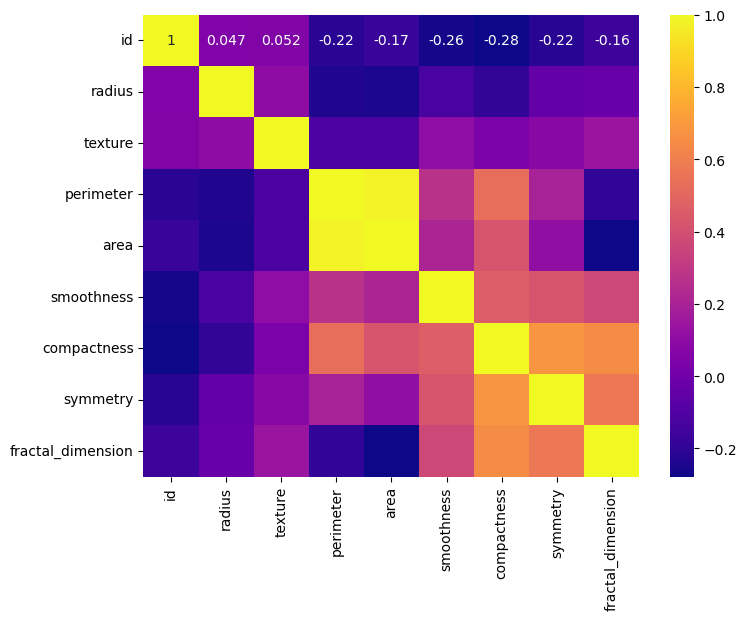

In [23]:
# correlation between features: this is to check for multicollinearity which is the presence of a relationship between independent variables
fil_df = data.drop(columns=['diagnosis_result'], axis=1)
correlation = fil_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

In [67]:
# preparing data for training 
from sklearn.model_selection import train_test_split

# split the dataset into train and test dataset in 80:20 ratio
train, test = train_test_split(data, test_size=0.2, random_state=122) # random_state is the seed used by the random number generator and test_size is the proportion of the dataset to include in the test split. 0.2 means 20% of the dataset will be used for testing and 80% for training.

# check the dimension of the train and test data
print('Training data: ', train.shape)
print('Test data: ', test.shape)

Training data:  (80, 9)
Test data:  (20, 9)


In [68]:
# segregate the feature matrix and target vector from the train and test data
Xtrain = train.drop(columns=['diagnosis_result'], axis=1) # feature matrix from the train data. drop the column 'diagnosis_result' from the train data. what is xtrain? 
ytrain = train['diagnosis_result'] # target vector from the train data. what is ytrain? ytrain is the target variable which is used to predict the diagnosis result.

Xtest = test.drop(columns=['diagnosis_result'], axis=1)
ytest = test['diagnosis_result']

In [69]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best Accuracy:  0.8375


In [70]:
# evaluate the best model on the test set
test_accuracy = best_tree.score(Xtest, ytest)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.8


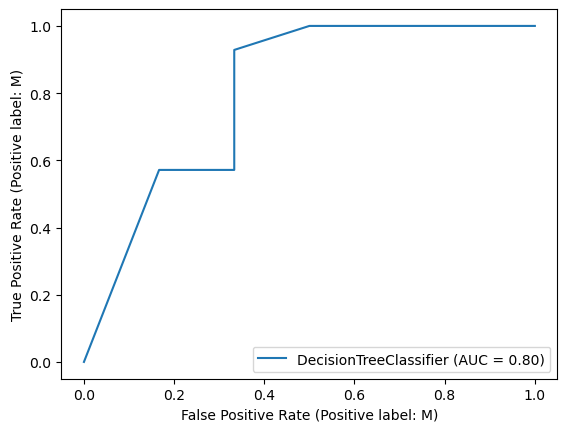

In [71]:
# check the ROC AUC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_tree, Xtest, ytest)
plt.show()

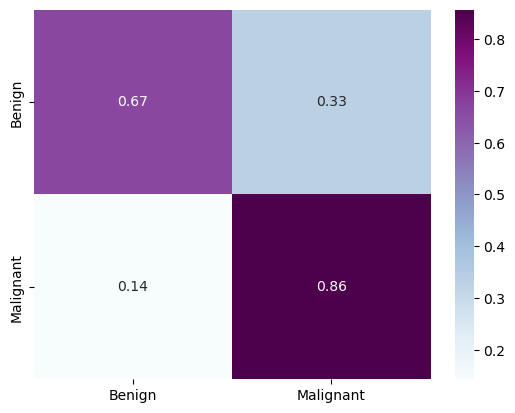

In [72]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

ypred = best_tree.predict(Xtest)

labels = ['Benign','Malignant']

cm_tree = confusion_matrix(ytest, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [73]:
# classification report
from sklearn.metrics import classification_report

tree_report = classification_report(ytest, ypred)
print(tree_report)

              precision    recall  f1-score   support

           B       0.67      0.67      0.67         6
           M       0.86      0.86      0.86        14

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20



In [74]:
# second Model: Random Forest Classification 
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_) # here best_score_ is the mean cross-validated score of the best_estimator

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.8375


In [75]:
# evaluate the best model on the test set
test_accuracy = best_forest.score(Xtest, ytest)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.9


In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Create a Voting Classifier with the best Decision Tree and Random Forest models
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', grid_search_tree.best_estimator_),
    ('random_forest', grid_search_forest.best_estimator_)
], voting='hard')  # You can use 'soft' if the models have predict_proba method

# Evaluate the hybrid model using cross-validation
hybrid_scores = cross_val_score(voting_clf, Xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-1)

# Print the hybrid model accuracy
print('Hybrid Model Accuracy: ', hybrid_scores.mean())


NameError: name 'grid_search_tree' is not defined

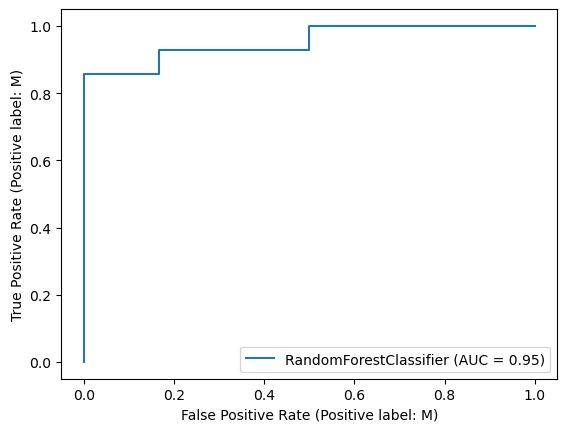

In [76]:
# check the ROC AUC curve

RocCurveDisplay.from_estimator(best_forest, Xtest, ytest)
plt.show()

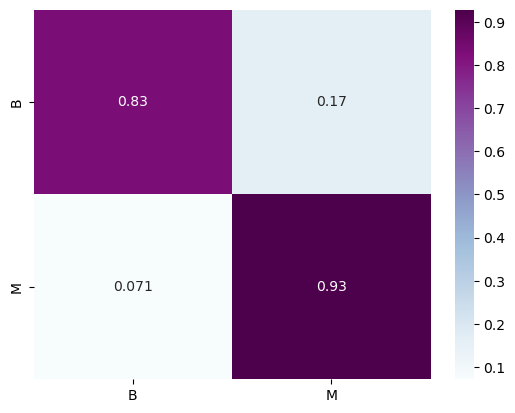

In [77]:
# visualize the confusion matrix using a heatmap
ypred = best_forest.predict(Xtest)

labels = ytest.unique()

cm_forest = confusion_matrix(ytest, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [78]:
# classification report
forest_report = classification_report(ytest, ypred)
print(forest_report)

              precision    recall  f1-score   support

           B       0.83      0.83      0.83         6
           M       0.93      0.93      0.93        14

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20



In [79]:
# 3rd One: Naive Bayes Classification 
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
mNB = clf.fit(Xtrain,ytrain)
ypred = mNB.predict(Xtest)

In [80]:
# evaluate the best model on the test set
test_accuracy = mNB.score(Xtest, ytest)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.85


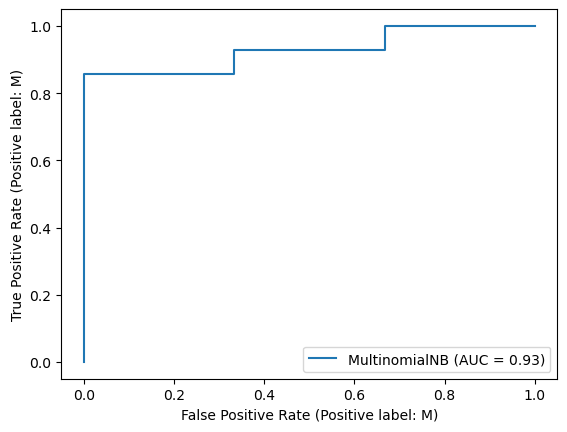

In [81]:
# check the ROC AUC curve

RocCurveDisplay.from_estimator(mNB, Xtest, ytest)
plt.show()

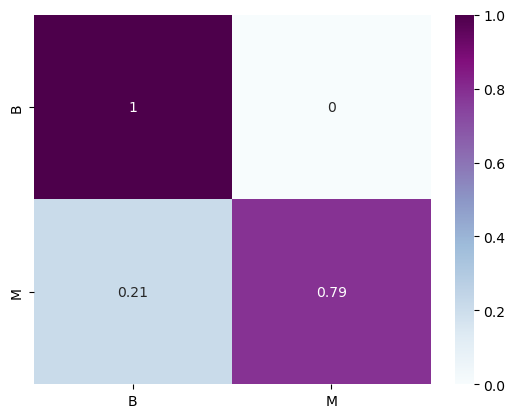

In [82]:
# visualize the confusion matrix using a heatmap:
cm_mNB = confusion_matrix(ytest, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_mNB, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [83]:
# classification report
mNB_report = classification_report(ytest, ypred)
print(mNB_report)

              precision    recall  f1-score   support

           B       0.67      1.00      0.80         6
           M       1.00      0.79      0.88        14

    accuracy                           0.85        20
   macro avg       0.83      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20



In [84]:
# 4th Models - Logistic Regression
# scale the feature matrix of train and test for logistic regression
from sklearn.preprocessing import MinMaxScaler

# create the MinMaxScaler object
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [85]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_scaled, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best Accuracy: ', grid_search_logreg.best_score_)

# get the best model
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.85


In [86]:
# evaluate the best model on the test set
test_accuracy = best_logreg.score(Xtest_scaled, ytest)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.95


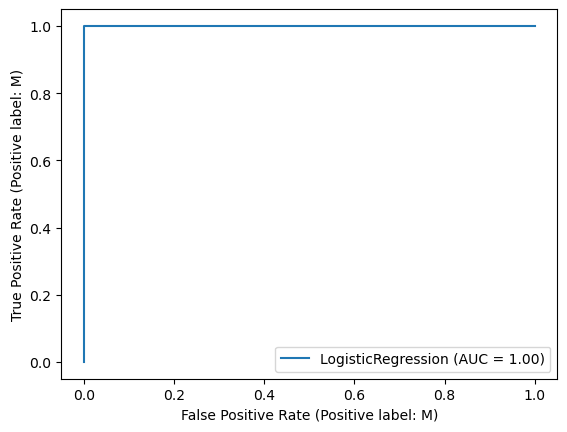

In [87]:
# check the ROC AUC curve

RocCurveDisplay.from_estimator(best_logreg, Xtest_scaled, ytest)
plt.show()

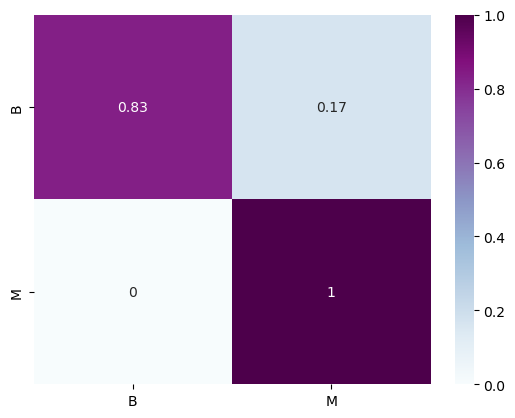

In [88]:
# visualize the confusion matrix using a heatmap
ypred = best_logreg.predict(Xtest_scaled)

labels = ytest.unique()

cm_logistic = confusion_matrix(ytest, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [89]:
# classification report
logistic_report = classification_report(ytest, ypred)
print(logistic_report)

              precision    recall  f1-score   support

           B       1.00      0.83      0.91         6
           M       0.93      1.00      0.97        14

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [91]:
# comparision of the models
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='weighted', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score']
    metricValue = [accuracy,precision,recall,fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [92]:
# generate the performance summary for various models trained
tree_summary = performance_evaluation(Xtest,ytest,best_tree,'Decision Tree')
forest_summary = performance_evaluation(Xtest,ytest,best_forest,'Random Forest')
multinomialNB_summary = performance_evaluation(Xtest,ytest,mNB,'MultinomialNB')
logistic_summary = performance_evaluation(Xtest_scaled,ytest,best_logreg,'Logistic Regression')

# combine the summary of each model into a dataframe 
comparison_df = pd.concat([tree_summary,forest_summary,multinomialNB_summary,logistic_summary], axis=1)

# disply the summary dafaframe
display(comparison_df)

,Decision Tree,Random Forest,MultinomialNB,Logistic Regression
Accuracy,0.8,0.9,0.850,0.950000
Precision,0.8,0.9,0.900,0.953333
Recall,0.8,0.9,0.850,0.950000
F1_Score,0.8,0.9,0.856,0.948589


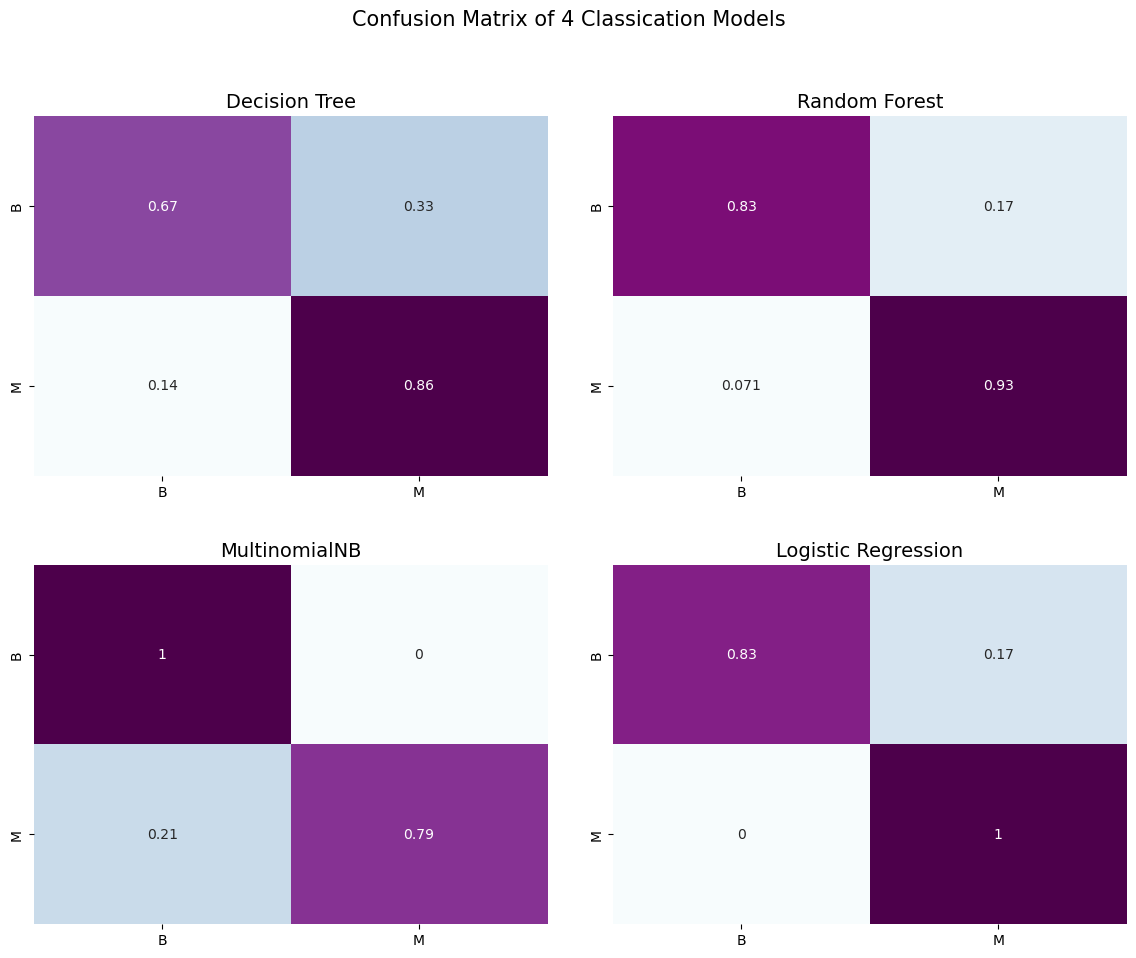

In [93]:
# confusion matrix for 4 classification models
figure, axes = plt.subplots(2,2, figsize=(12,10))
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,0])
axes[0,0].set_title('Decision Tree', fontsize=14)
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,1])
axes[0,1].set_title('Random Forest', fontsize=14)
sns.heatmap(cm_mNB, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,0])
axes[1,0].set_title('MultinomialNB', fontsize=14)
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,1])
axes[1,1].set_title('Logistic Regression', fontsize=14)
figure.suptitle('Confusion Matrix of 4 Classication Models', fontsize=15)
plt.tight_layout(pad=3)
plt.show()